---------------

**If any part of this notebook is used in your research, please cite with the reference found in** **[README.md](https://github.com/pysal/spaghetti#bibtex-citation).**


----------------

## Connected components in a spatial network
### Identifying and visualizing the parts of a network

**Author: James D. Gaboardi** **<jgaboardi@gmail.com>**

**This notebook is a walk-through for:**

1. Instantiating a simple network with `libpysal.cg.Chain` objects
2. Working with the network components
3. Visualizing the components and (non)articulation vertices

In [1]:
%load_ext watermark
%watermark

2020-02-05T10:37:17-05:00

CPython 3.7.3
IPython 7.10.2

compiler   : Clang 9.0.0 (tags/RELEASE_900/final)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


**In addtion to the base** **[spaghetti requirements](https://github.com/pysal/spaghetti/blob/master/requirements.txt)** **(and their dependecies), this notebook requires installations of:**

* [geopandas](http://geopandas.org)
    * `$ conda install -c conda-forge geopandas`
* [matplotlib](https://matplotlib.org)
    * `$ conda install matplotlib`
    
-----------------------

In [2]:
import spaghetti
import geopandas
import libpysal
from libpysal.cg import Point, Chain
import matplotlib
%matplotlib inline
%watermark -w
%watermark -iv

watermark 2.0.2
geopandas  0.6.2
libpysal   4.2.0
spaghetti  1.4.1
matplotlib 3.1.2



In [3]:
try:
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats("retina")
except ImportError:
    pass

----------------

### 1. Instantiate a network from two collections of `libpysal.cg.Chain` objects

In [4]:
plus1 = [
    Chain([Point([1, 2]), Point([0, 2])]),
    Chain([Point([1, 2]), Point([1, 1])]),
    Chain([Point([1, 2]), Point([1, 3])]),
]
plus2 = [
    Chain([Point([2, 1]), Point([2, 0])]),
    Chain([Point([2, 1]), Point([3, 1])]),
    Chain([Point([2, 1]), Point([2, 2])]),
]
lines = plus1 + plus2

In [5]:
ntw = spaghetti.Network(in_data=lines)

/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


#### Here we get a warning because the network we created has 2 connected components

In [6]:
ntw.network_n_components

2

#### The network components can be inspected through the `network_component2arc` attribute

In [7]:
ntw.network_component2arc

{0: [(0, 1), (0, 2), (0, 3)], 1: [(4, 5), (4, 6), (4, 7)]}

#### Extract the network arc and vertices as `geopandas.GeoDataFrame` objects

In [8]:
# network vertices and arcs
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

#### Network component labels are found in the `"comp_label"` field

In [9]:
arcs_df

,id,geometry,comp_label
0,"(0, 1)","LINESTRING (1.00000 2.00000, 0.00000 2.00000)",0
1,"(0, 2)","LINESTRING (1.00000 2.00000, 1.00000 1.00000)",0
2,"(0, 3)","LINESTRING (1.00000 2.00000, 1.00000 3.00000)",0
3,"(4, 5)","LINESTRING (2.00000 1.00000, 2.00000 0.00000)",1
4,"(4, 6)","LINESTRING (2.00000 1.00000, 3.00000 1.00000)",1
5,"(4, 7)","LINESTRING (2.00000 1.00000, 2.00000 2.00000)",1


#### Plot the disconnected network and symbolize the arcs bases on the value of `"comp_label"`

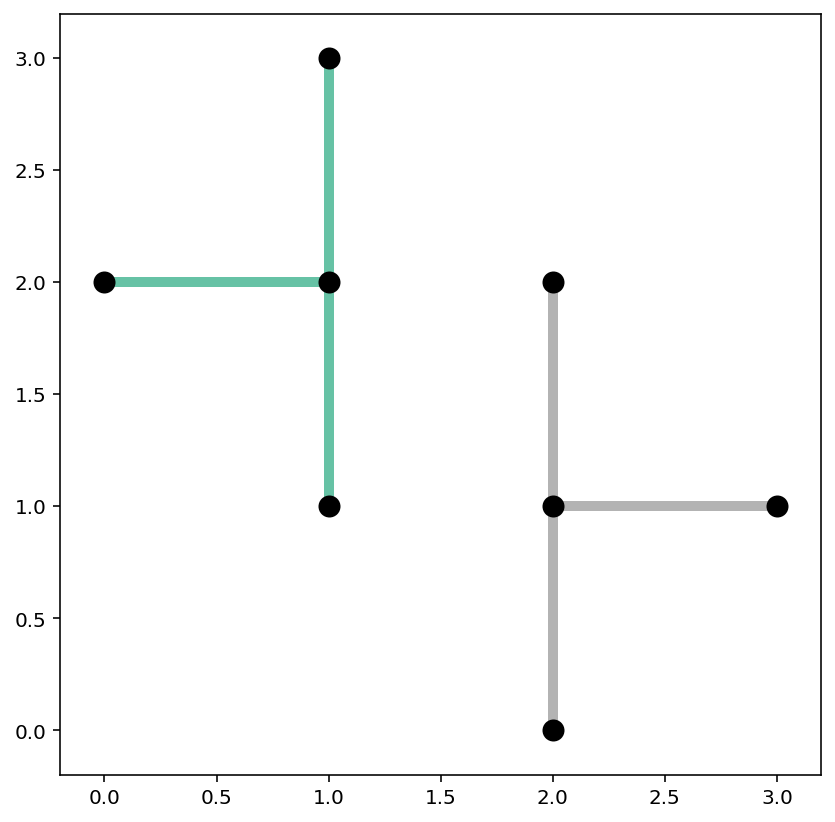

In [10]:
base = arcs_df.plot(column="comp_label", cmap="Set2", linewidth=5, figsize=(7, 7))
vertices_df.plot(ax=base, color="k", markersize=100, zorder=2);


----------------

### 2. Add to the network created above

In [11]:
new_lines = [
    Chain([Point([1, 1]), Point([2, 2])]),
    Chain([Point([0.5, 1]), Point([0.5, 0.5])]),
    Chain([Point([0.5, 0.5]), Point([1, 0.5])]),
    Chain([Point([2, 2.5]), Point([2.5, 2.5])]),
    Chain([Point([2.5, 2.5]), Point([2.5, 2])]),
]
lines += new_lines

In [12]:
ntw = spaghetti.Network(in_data=lines)

/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: (8, 10), (11, 13).
  warnings.warn(message)


#### Now there are 3 connected components in the network

In [13]:
ntw.network_n_components

3

In [14]:
ntw.network_component2arc

{0: [(0, 1), (0, 2), (0, 3), (2, 7), (4, 5), (4, 6), (4, 7)],
 1: [(8, 9), (9, 10)],
 2: [(11, 12), (12, 13)]}

In [15]:
# network vertices and arcs
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

In [16]:
arcs_df

,id,geometry,comp_label
0,"(0, 1)","LINESTRING (1.00000 2.00000, 0.00000 2.00000)",0
1,"(0, 2)","LINESTRING (1.00000 2.00000, 1.00000 1.00000)",0
2,"(0, 3)","LINESTRING (1.00000 2.00000, 1.00000 3.00000)",0
3,"(2, 7)","LINESTRING (1.00000 1.00000, 2.00000 2.00000)",0
4,"(4, 5)","LINESTRING (2.00000 1.00000, 2.00000 0.00000)",0
5,"(4, 6)","LINESTRING (2.00000 1.00000, 3.00000 1.00000)",0
6,"(4, 7)","LINESTRING (2.00000 1.00000, 2.00000 2.00000)",0
7,"(8, 9)","LINESTRING (0.50000 1.00000, 0.50000 0.50000)",1
8,"(9, 10)","LINESTRING (0.50000 0.50000, 1.00000 0.50000)",1
9,"(11, 12)","LINESTRING (2.00000 2.50000, 2.50000 2.50000)",2


#### We can also inspect the non-articulation points in the network. Non-articulation points are vertices in a network that are degree-2. A vertex is degree-2 if, and only if, it is directly connected to only 2 other vertices.

In [17]:
ntw.non_articulation_points

[9, 2, 12, 7]

#### Slice out the articulation points and non-articulation points

In [18]:
napts = ntw.non_articulation_points
articulation_vertices = vertices_df[~vertices_df["id"].isin(napts)]
non_articulation_vertices = vertices_df[vertices_df["id"].isin(napts)]

#### Plot the connected components while making a distinction between articulation points and non-articulation points

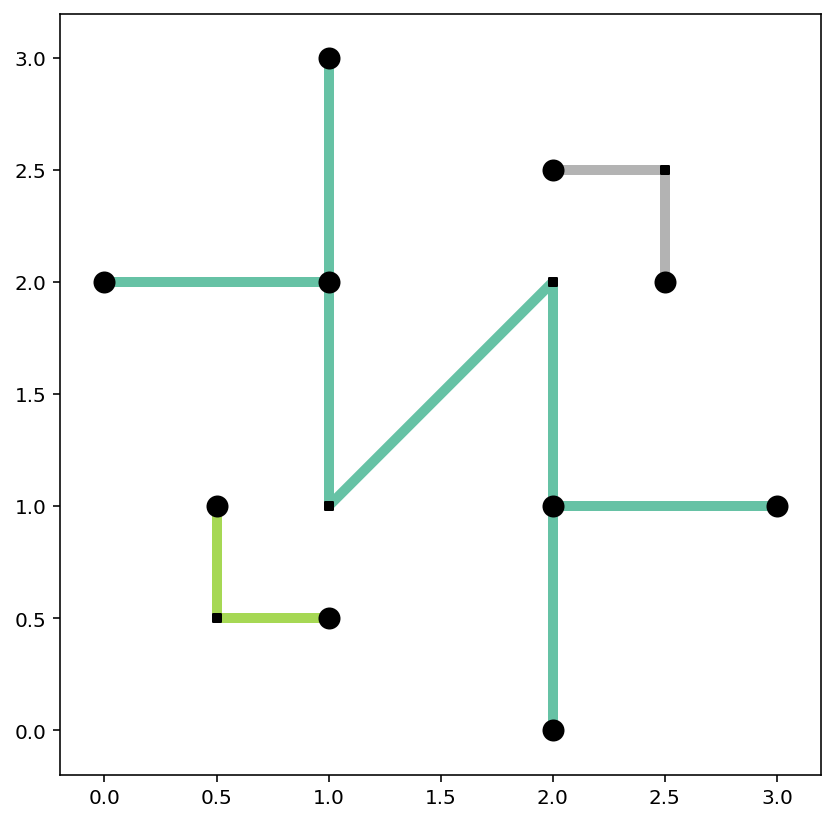

In [19]:
base = arcs_df.plot(column="comp_label", cmap="Set2", linewidth=5, figsize=(7, 7))
articulation_vertices.plot(ax=base, color="k", markersize=100, zorder=2)
non_articulation_vertices.plot(ax=base, marker="s", color="k", markersize=20, zorder=2);

----------------

### 3. Add a loop of `libpysal.cg.Chain` objects

In [20]:
new_lines = [
    Chain([Point([3, 1]), Point([3.25, 1.25])]),
    Chain([Point([3.25, 1.25]), Point([3.5, 1.25])]),
    Chain([Point([3.5, 1.25]), Point([3.75, 1])]),
    Chain([Point([3.75, 1]), Point([3.5, .75])]),
    Chain([Point([3.5, .75]), Point([3.25, .75])]),
    Chain([Point([3.25, .75]), Point([3, 1])]),
]
lines += new_lines

In [21]:
ntw = spaghetti.Network(in_data=lines)

/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: (8, 10), (11, 13).
  warnings.warn(message)


In [22]:
ntw.network_n_components

3

In [23]:
ntw.network_component2arc

{0: [(0, 1),
  (0, 2),
  (0, 3),
  (2, 7),
  (4, 5),
  (4, 6),
  (4, 7),
  (6, 14),
  (6, 18),
  (14, 15),
  (15, 16),
  (16, 17),
  (17, 18)],
 1: [(8, 9), (9, 10)],
 2: [(11, 12), (12, 13)]}

In [24]:
# network vertices and arcs
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

In [25]:
arcs_df

,id,geometry,comp_label
0,"(0, 1)","LINESTRING (1.00000 2.00000, 0.00000 2.00000)",0
1,"(0, 2)","LINESTRING (1.00000 2.00000, 1.00000 1.00000)",0
2,"(0, 3)","LINESTRING (1.00000 2.00000, 1.00000 3.00000)",0
3,"(2, 7)","LINESTRING (1.00000 1.00000, 2.00000 2.00000)",0
4,"(4, 5)","LINESTRING (2.00000 1.00000, 2.00000 0.00000)",0
5,"(4, 6)","LINESTRING (2.00000 1.00000, 3.00000 1.00000)",0
6,"(4, 7)","LINESTRING (2.00000 1.00000, 2.00000 2.00000)",0
7,"(6, 14)","LINESTRING (3.00000 1.00000, 3.25000 1.25000)",0
8,"(6, 18)","LINESTRING (3.00000 1.00000, 3.25000 0.75000)",0
9,"(8, 9)","LINESTRING (0.50000 1.00000, 0.50000 0.50000)",1


#### Here we can see that all the new network vertices are non-articulation point

In [26]:
ntw.non_articulation_points

[2, 7, 9, 12, 14, 15, 16, 17, 18]

#### Slice out the articulation points and non-articulation points

In [27]:
napts = ntw.non_articulation_points
articulation_vertices = vertices_df[~vertices_df["id"].isin(napts)]
non_articulation_vertices = vertices_df[vertices_df["id"].isin(napts)]

#### The new network vertices are non-articulation points because they form a closed ring

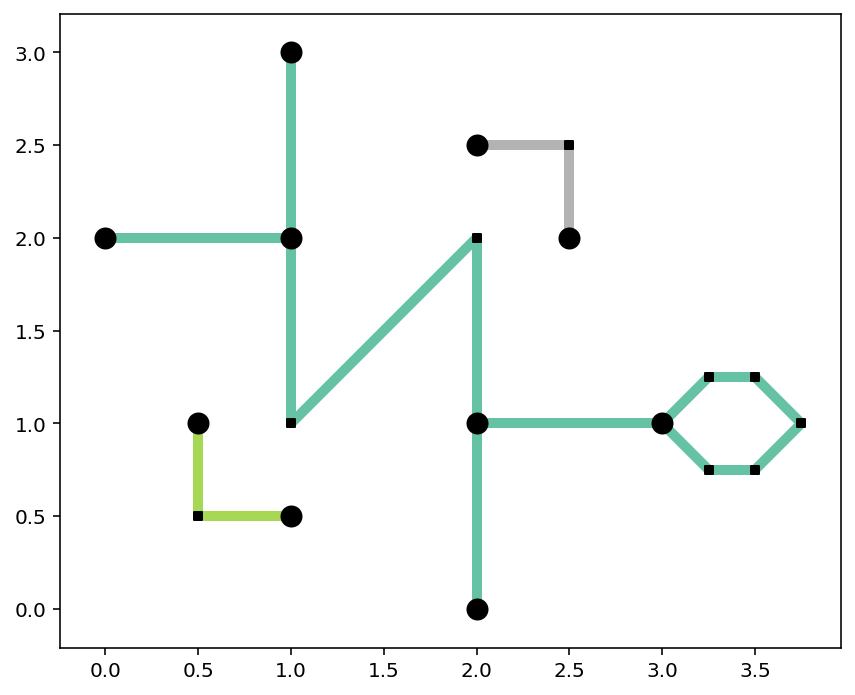

In [28]:
base = arcs_df.plot(column="comp_label", cmap="Set2", linewidth=5, figsize=(7, 7))
articulation_vertices.plot(ax=base, color="k", markersize=100, zorder=2)
non_articulation_vertices.plot(ax=base, marker="s", color="k", markersize=20, zorder=2);

-----------------------------------------------------